In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import re
from collections import Counter

## Read Corpus

In [3]:
import pickle

In [4]:
with open('../pickle_files/doc_parsed_data.pickle', 'rb') as f:
    doc_data_df = pickle.load(f)
type(doc_data_df),doc_data_df.shape

(pandas.core.frame.DataFrame, (39, 9))

In [5]:
doc_data_df.head()

,hyperlink,filename,author,source,title_arabic,title_latin_translit,tags,section_titles,raw_text
0,http://saramusik.org/5/textei/,5.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],رسالة في خبر صناعة التّأليف,risāla fī ẖabar ṣināʿat al-taʾlīf,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...","[1 , تبيا, النّغم المتشابه في الكيفيّة, تمثيل ...",[بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة من...
1,http://saramusik.org/6/textei/,6.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],كتاب المصوّتات الوتريّة من ذات الوتر الواحد إل...,kitāb al-muṣawwiṭāt al-watariyya min ḍāt al-wa...,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...",[لمقالة الأولى : في ذكر الآلات الصّوتيّة وسائر...,[اعتمادا على تحقيق زكريّا يوسف]\n\nأَطَالَ الَ...
2,http://saramusik.org/7/textei/,7.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تونس, ألمانيا]",رسالة في أجزاء خبريّة في الموسيقى,risāla fī aǧzāʾ ẖabariyya fī al-mūsīqā,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لمقالة الأول, لمقالة الثّاني, لمقالة ...",أنار إليه من خفيّات الأمور بموضحات الرّسوم أفض...
3,http://saramusik.org/9/textei/,9.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تركيا, ألمانيا]",رسالة الكندي في اللّحون والنّغم,Risālat al-kindī fī al-luhūn wa al-naġam,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لفنّ الأوّل : [في تركيب العود وقسمة ا...",بِسْمِ اللَّهِ الرَّحْمَانِ الرَّحِيمِ\nوَمَا ...
4,http://saramusik.org/10/textei/,10.txt,صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي,"[تونس, تونس, نمسا, سعوديّة, مصر, مصر, مصر, مصر...",كتاب الأدوار,Kitāb al-Adwār,"[نظريّات موسيقيّة, المدرسة الأرمويّة]","[مقدّمة, ِي تَعْرِيفِ النَّغَمِ وَبَيَانِ الحِ...",الدَّسَاتِينُ هِيَ عَلَامَاتٌ تُوضَعُ عَلَى سَ...


****

## Exploratory data analysis

Stopped here 2/26/2020

In [8]:
from nltk import FreqDist

def analyze_corpus_charset(corpus):
    fdist = FreqDist([c for doc in corpus for c in doc])

    corpus_chars_df = pd.DataFrame(fdist.items())
    corpus_chars_df.columns = ['character','frequency']
    corpus_chars_df['unicode_dec']= corpus_chars_df.character.map(ord)
    corpus_chars_df['unicode_hex']= corpus_chars_df.character.map(lambda x: hex(ord(x)))
    corpus_chars_df = corpus_chars_df.set_index('character')

    idx1 = corpus_chars_df.unicode_hex.str.startswith('0x6') & (corpus_chars_df.unicode_hex.map(len)==5)
    idx2 = (corpus_chars_df.unicode_hex.str.startswith('0xfb') | corpus_chars_df.unicode_hex.str.startswith('0xfc') | corpus_chars_df.unicode_hex.str.startswith('0xfd') | corpus_chars_df.unicode_hex.str.startswith('0xfe')) & (corpus_chars_df.unicode_hex.map(len)==6)

    print("number of characters:" + str(fdist.N()))
    print("number of unique characters:" + str(fdist.B()))
    print("Number of characters from the Standard Arabic character set: %d" %idx1.sum())
    print("Number of characters from the Extended Arabic character set: %d" %idx2.sum())

    print('List of distinct characters:')
    print(sorted(list(fdist.keys())))

    print('The 20 most common characters:')
    print(fdist.most_common(20))

    print('The 20 least common characters:')
    print(fdist.most_common()[-20:])

    fdist.plot(20, cumulative=True)

    return (fdist,corpus_chars_df)

number of characters:542130
number of unique characters:128
Number of characters from the Standard Arabic character set: 69
Number of characters from the Extended Arabic character set: 0
List of distinct characters:
['\t', '\n', ' ', '!', '"', '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '>', 'N', '[', ']', 'e', 'n', 'o', '{', '}', '~', '\xa0', '¦', '«', '»', 'έ', 'γ', 'ν', 'ο', 'ς', 'ג', 'ד', 'ה', 'ז', 'ח', 'כ', 'ן', '،', '؛', '؟', 'ء', 'آ', 'أ', 'ؤ', 'إ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ـ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى', 'ي', 'ً', 'ٌ', 'ٍ', 'َ', 'ُ', 'ِ', 'ّ', 'ْ', 'ٓ', 'ٔ', 'ٕ', '٠', '١', '٢', '٣', '٤', '٥', '٦', '٧', '٨', '٩', '٬', '٭', 'ٱ', 'ە', '۟', '۴', '۵', '۶', '\u200f', '‘', '’', '“', '”', '…', '\u2028', '\u202c', '\u202e', '❊']
The 20 most common characters:
[(' ', 82207), ('ا', 49313), ('ل', 41807), ('َ', 31558), ('ي', 22936), ('و', 22492), ('

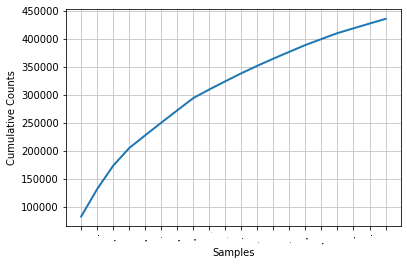

In [10]:
raw_corpus_chars_fdist,raw_corpus_chars_df = analyze_corpus_charset(doc_data_df.raw_text)

In [11]:
raw_corpus_chars_df.head()

,frequency,unicode_dec,unicode_hex
character,,,
[,580,91,0x5b
ب,13448,1576,0x628
ا,49313,1575,0x627
ل,41807,1604,0x644
ع,12075,1593,0x639


In [32]:
idx=raw_corpus_chars_df.unicode_hex.str.startswith('0x64')|raw_corpus_chars_df.unicode_hex.str.startswith('0x65')
idx.sum()

23

In [34]:
raw_corpus_chars_df[idx].sort_values(by='unicode_hex')

,frequency,unicode_dec,unicode_hex
character,,,
ـ,2803,1600,0x640
ف,10736,1601,0x641
ق,8138,1602,0x642
ك,8144,1603,0x643
ل,41807,1604,0x644
م,21927,1605,0x645
ن,22113,1606,0x646
ه,14295,1607,0x647
و,22492,1608,0x648


### Analyze rare and non-rare characters

In [13]:
raw_corpus_chars_df.frequency.describe()

count      128.000000
mean      4235.390625
std      10441.276488
min          1.000000
25%         17.000000
50%         94.500000
75%       3374.500000
max      82207.000000
Name: frequency, dtype: float64

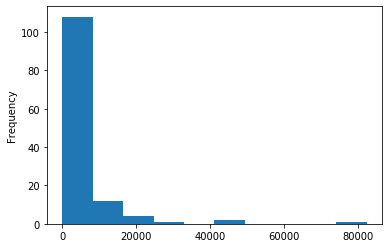

In [12]:
raw_corpus_chars_df.frequency.plot.hist()

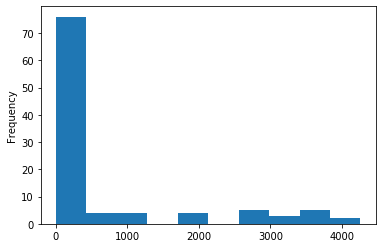

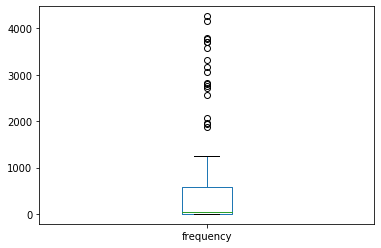

In [17]:
idx = raw_corpus_chars_df.frequency<=5000
raw_corpus_chars_df.loc[idx,'frequency'].plot.hist()
plt.show()
raw_corpus_chars_df.loc[idx,'frequency'].plot.box()

70 58


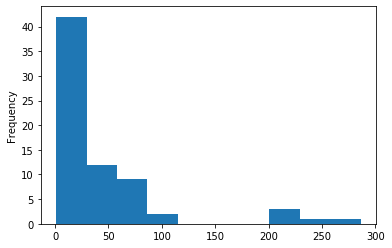

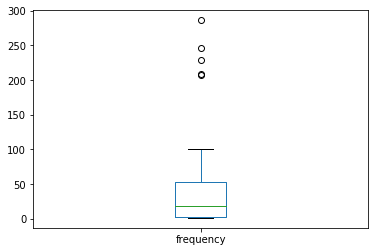

In [24]:
idx = raw_corpus_chars_df.frequency<=300
print(idx.sum(),(~idx).sum())

raw_corpus_chars_df.loc[idx,'frequency'].plot.hist()
plt.show()
raw_corpus_chars_df.loc[idx,'frequency'].plot.box()

In [37]:
idx = raw_corpus_chars_df.frequency<=150
print(idx.sum(),(~idx).sum())
sorted(raw_corpus_chars_df[idx].index.tolist())

65 63


['\t',
 '(',
 ')',
 '+',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '>',
 'N',
 'e',
 'n',
 'o',
 '{',
 '}',
 '~',
 '¦',
 'έ',
 'γ',
 'ν',
 'ο',
 'ς',
 'ג',
 'ד',
 'ה',
 'ז',
 'ח',
 'כ',
 'ן',
 'ٓ',
 'ٔ',
 'ٕ',
 '٠',
 '١',
 '٢',
 '٣',
 '٤',
 '٥',
 '٦',
 '٧',
 '٨',
 '٩',
 '٬',
 '٭',
 'ە',
 '۟',
 '۴',
 '۵',
 '۶',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '\u2028',
 '\u202c',
 '\u202e',
 '❊']

In [38]:
sorted(raw_corpus_chars_df[~idx].index.tolist())

['\n',
 ' ',
 '!',
 '"',
 '*',
 '-',
 '.',
 ':',
 '[',
 ']',
 '\xa0',
 '«',
 '»',
 '،',
 '؛',
 '؟',
 'ء',
 'آ',
 'أ',
 'ؤ',
 'إ',
 'ئ',
 'ا',
 'ب',
 'ة',
 'ت',
 'ث',
 'ج',
 'ح',
 'خ',
 'د',
 'ذ',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'ط',
 'ظ',
 'ع',
 'غ',
 'ـ',
 'ف',
 'ق',
 'ك',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ى',
 'ي',
 'ً',
 'ٌ',
 'ٍ',
 'َ',
 'ُ',
 'ِ',
 'ّ',
 'ْ',
 'ٱ',
 '\u200f']

In [39]:
raw_corpus_chars_df[~idx].sort_values(by='unicode_dec')

,frequency,unicode_dec,unicode_hex
character,,,
\n,3773,10,0xa
,82207,32,0x20
!,207,33,0x21
"""",317,34,0x22
*,2068,42,0x2a
-,301,45,0x2d
.,3164,46,0x2e
:,1939,58,0x3a
[,580,91,0x5b


### Observations and conclusions

- Non-rare characters:

        standard arabic letters
        visual formatting symbols
        digits
        punctuation marks
        whitespace
        invisible control characters: \u200f (bidirectional ordering character), \xa0 (U+00A0 NO-BREAK SPACE)
        diacritic marks: \u064B,\u064C,\u064D,\u064E,\u064F,\u0650,\u0651,\u0652

- Rare characters:

        non-standard arabic letters (they are variations of standard arabic letters)
        non-arabic characters (latin)
        visual formatting symbols: ❊
        digits
        punctuation marks
        whitespace
        invisible control characters: \u2028,\u202c,\u202e (bidirectional ordering characters)

- Characters that should be normalized: non-standard arabic letters

       'ٱ'   ARABIC ALEF WASLA  (extended letter used in Koranic Arabic)  \u0671
       'ە'   EXTENDED ARABIC LETTER AE  (used in middle-asian countries ...)  \u06D5
       '۶'   EXTENDED ARABIC-INDIC DIGIT SIX   \u06F6 

- Characters that convey little meaning and should be removed:

        TATWIL character (kashida)  \u0640
        visual formatting symbols
        punctuation marks
        whitespace
        invisible control characters


**Note about the NO-BREAK SPACE character**

- Also called non-breaking space, non-breakable space (NBSP), hard space, or fixed space.
- It is a space character that prevents an automatic line break at its position.

*****

## Text preprocessing

processing pipeline:

1. Orthographic normalization (remove diacritic marks; tatwil; normalize alif character; )
2. Tokenization (remove non-word characters and convert to sequence of words ...]
3. Light stemming based on common prefixes and suffixes (**TO DO**)
4. remove stopwords
5. Convert to word ngrams

In [45]:
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, regexp_tokenize

In [61]:
## character-level preprocessing

from arabic_nlp_utils import remove_tatweel, remove_diacritics, normalize_arabic_letters

def cleanup_arabic_text(text):

    # orthographic normalization of certain arabic characters
    text = remove_diacritics(text)
    text = remove_tatweel(text)
    text = normalize_arabic_letters(text)
    
    # Remove redundant white spaces
    text = re.sub('\s+', ' ', text)
    text = text.strip()

    return text

In [84]:
## word-level preprocessing

#tokenize_regex = "(\w+)|(«\s{0,}\w+\s{0,}»)"
tokenize_regex = "\w+"
stop_words_ar = stopwords.words('arabic')

def preprocess_text(doc,ngram_range=1):

    clean_doc = cleanup_arabic_text(doc)

    ## Tokenization using custom regular expression
    doc_tokens = [''.join(_) for _ in regexp_tokenize(clean_doc,tokenize_regex)]

    ## TO DO: light stemming based on common prefixes

    ## Remove stopwords and one-character tokens
    doc_tokens = [tok for tok in doc_tokens if (tok not in stop_words_ar and len(tok)>1)]

    ## Convert to ngrams instead of single tokens
    doc_ngrams = doc_tokens
    if ngram_range>1:
        for n in range(2,ngram_range+1):
            doc_ngrams = doc_ngrams + [' '.join(list(_)) for _ in ngrams(doc_tokens, n)]

    return doc_ngrams

***

BEGIN UNIT TEST

In [46]:
doc = doc_data_df.raw_text[0]
len(doc)

22768

In [47]:
doc

'[بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة منقوصة في بدايتها.]\nوَ « ك » إِلَى « ا »\nوَقَدْ بَيَّنَّا أَنَّ فَضْلَ\nفَإِذًا، بُعْدُ « و » الَّتِي هِيَ مُطْلَقُ المَثْلَثِ مِنْ « ا » الَّتِي هِيَ أَوَّلُ دَسَاتِينِ المَثْنَى هُوَ البُعْدُ الَّذِي بِالخَمْسَةِ.\nوَمِنَ الَّذِي بِالخَمْسَةِ وَالَّذِي بِالأَرْبَعَةِ رُكِّبَ الَّذِي بِالكُلِّ.\nفَإذًا بُعْدُ « ا » مِنَ البَمِّ مِنْ « ا » مِنَ المَثْنَى هُوَ الَّذِي بِالكُلِّ. فَإِذًا نِسْبَةُ « ا » مِنَ البَمِّ إِلَى « ا » مِنَ المَثْنَى هِيَ نِسْبَةُ المُضَاعَفِ بِالإِثْنَينِ. فَبِالاضْطِرَارِ أَنْ تَكُونُ « ا » مِنَ المَثْنَى مِنْ كَيْفِيَّةِ « ا » مِنَ البَمِّ، لِمَا قَدَّمْنَا.\nوَعَلَى هَذَا المِثَالِ يَتَتَالَى النَّغَمُ المُتَتَالِي فِي التَّشَابُهِ فِي الكَيْفِيَّةِ، فَإِنَّ « ب » مِنَ المَثْنَى هِيَ « ب » مِنَ\nوَكَذَلِكَ « جـ » مِنَ المَثْنَى هِيَ « جـ » مِنَ البَمِّ.\nوَ« د » مِنَ المَثْنَى « د » مِنَ البَمِّ، وَهْيَ « د » مِنَ الزِّيرِ.\nوَكَذَلِكَ « و » مِنَ الزِّيرِ هِيَ « و » مِنَ المَثْلَثِ.\nوَ « ز » مِنَ الزِّيرِ هِيَ «

In [51]:
doc.split('\n')

['[بالاعتماد على تحقيق يوسف شوقي.]',
 '[الرّسالة منقوصة في بدايتها.]',
 'وَ « ك » إِلَى « ا »',
 'وَقَدْ بَيَّنَّا أَنَّ فَضْلَ',
 'فَإِذًا، بُعْدُ « و » الَّتِي هِيَ مُطْلَقُ المَثْلَثِ مِنْ « ا » الَّتِي هِيَ أَوَّلُ دَسَاتِينِ المَثْنَى هُوَ البُعْدُ الَّذِي بِالخَمْسَةِ.',
 'وَمِنَ الَّذِي بِالخَمْسَةِ وَالَّذِي بِالأَرْبَعَةِ رُكِّبَ الَّذِي بِالكُلِّ.',
 'فَإذًا بُعْدُ « ا » مِنَ البَمِّ مِنْ « ا » مِنَ المَثْنَى هُوَ الَّذِي بِالكُلِّ. فَإِذًا نِسْبَةُ « ا » مِنَ البَمِّ إِلَى « ا » مِنَ المَثْنَى هِيَ نِسْبَةُ المُضَاعَفِ بِالإِثْنَينِ. فَبِالاضْطِرَارِ أَنْ تَكُونُ « ا » مِنَ المَثْنَى مِنْ كَيْفِيَّةِ « ا » مِنَ البَمِّ، لِمَا قَدَّمْنَا.',
 'وَعَلَى هَذَا المِثَالِ يَتَتَالَى النَّغَمُ المُتَتَالِي فِي التَّشَابُهِ فِي الكَيْفِيَّةِ، فَإِنَّ « ب » مِنَ المَثْنَى هِيَ « ب » مِنَ',
 'وَكَذَلِكَ « جـ » مِنَ المَثْنَى هِيَ « جـ » مِنَ البَمِّ.',
 'وَ« د » مِنَ المَثْنَى « د » مِنَ البَمِّ، وَهْيَ « د » مِنَ الزِّيرِ.',
 'وَكَذَلِكَ « و » مِنَ الزِّيرِ هِيَ « و » مِنَ المَثْلَثِ.

In [70]:
clean_doc = cleanup_arabic_text(doc)
doc_ngrams = preprocess_text(clean_doc)
len(clean_doc),len(doc_ngrams)

(15753, 1920, 5757)

In [71]:
print(doc[0:200])

[بالاعتماد على تحقيق يوسف شوقي.]
[الرّسالة منقوصة في بدايتها.]
وَ « ك » إِلَى « ا »
وَقَدْ بَيَّنَّا أَنَّ فَضْلَ
فَإِذًا، بُعْدُ « و » الَّتِي هِيَ مُطْلَقُ المَثْلَثِ مِنْ « ا » الَّتِي هِيَ أَوَّلُ


In [72]:
print(clean_doc[0:200])

[بالاعتماد علي تحقيق يوسف شوقي.] [الرسالة منقوصة في بدايتها.] و « ك » الي « ا » وقد بينا ان فضل فاذا، بعد « و » التي هي مطلق المثلث من « ا » التي هي اول دساتين المثني هو البعد الذي بالخمسة. ومن الذي ب


In [77]:
doc_ngrams[0:10]

['بالاعتماد',
 'علي',
 'تحقيق',
 'يوسف',
 'شوقي',
 'الرسالة',
 'منقوصة',
 'بدايتها',
 'الي',
 'وقد']

In [74]:
doc_ngrams[-10:]

['شوال سنة 631',
 'سنة 631 بمدينة',
 '631 بمدينة دمشق',
 'بمدينة دمشق نسخة',
 'دمشق نسخة سقيمة',
 'نسخة سقيمة معتمدة',
 'سقيمة معتمدة فهرست',
 'معتمدة فهرست شلواح',
 'فهرست شلواح 1979',
 'شلواح 1979 175']

END UNIT TEST

In [113]:
corpus_words = doc_data_df.raw_text.map(lambda _: preprocess_text(_,ngram_range=1))
corpus_ngrams = doc_data_df.raw_text.map(lambda _: preprocess_text(_,ngram_range=3))

In [114]:
corpus_words.head()

0    [بالاعتماد, علي, تحقيق, يوسف, شوقي, الرسالة, م...
1    [اعتمادا, علي, تحقيق, زكريا, يوسف, اطال, الله,...
2    [انار, اليه, خفيات, الامور, بموضحات, الرسوم, ا...
3    [بسم, الله, الرحمان, الرحيم, توفيقي, الا, بالل...
4    [الدساتين, علامات, توضع, علي, سواعد, الالات, ذ...
Name: raw_text, dtype: object

In [115]:
corpus_ngrams.head()

0    [بالاعتماد, علي, تحقيق, يوسف, شوقي, الرسالة, م...
1    [اعتمادا, علي, تحقيق, زكريا, يوسف, اطال, الله,...
2    [انار, اليه, خفيات, الامور, بموضحات, الرسوم, ا...
3    [بسم, الله, الرحمان, الرحيم, توفيقي, الا, بالل...
4    [الدساتين, علامات, توضع, علي, سواعد, الالات, ذ...
Name: raw_text, dtype: object

***

## Exploration of tokenized corpus

### Distribution of number of words per document

In [89]:
u = corpus_words.map(len)
u.describe()

count       39.000000
mean      1713.153846
std       2122.908166
min         54.000000
25%        397.500000
50%        998.000000
75%       1939.000000
max      11485.000000
Name: raw_text, dtype: float64

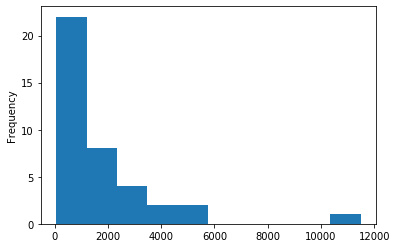

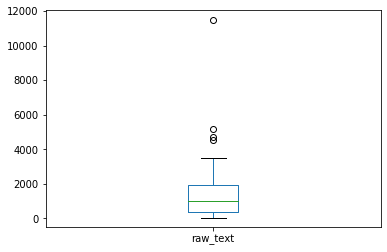

In [91]:
u.plot.hist()
plt.show()
u.plot.box()

#### very short documents

In [112]:
print((u<200).sum())
pd.DataFrame({'doc_title':doc_data_df.title_arabic[u<200],'nb_words':u[u<200]}).sort_values(by='nb_words')

5


,doc_title,nb_words
13,كتاب الامتاع والانتفاع في مسألة سماع السّماع,54
35,تلخيص كتاب النّفس,89
7,كتاب الشّفاء,107
4,كتاب الأدوار,129
18,كتاب النّفس : القول في السّمع,172


#### very long documents

In [110]:
print((u>4000).sum())
pd.DataFrame({'doc_title':doc_data_df.title_arabic[u>4000],'nb_words':u[u>4000]}).sort_values(by='nb_words')

4


,doc_title,nb_words
24,رسالة القيان,4508
12,برء الأسقام، شرح القصيدة في الأنغام,4707
31,كتاب اللهو والملاهي,5168
27,العقد الفريد,11485


### Distribution of word frequency

In [175]:
fdist_words = FreqDist([tok for doc in corpus_words for tok in doc])
fdist_words.N(),fdist_words.B()
print("number of words:",fdist_words.N())
print("number of distinct words:",fdist_words.B())
print('Number of distinct words that occur only once:',(pd.Series(list(fdist_words.values()))==1).sum())

number of words: 66813
number of distinct words: 20872
Number of distinct words that occur only once: 13481


In [134]:
print('The 20 most common words:')
fdist_words.most_common(20)

The 20 most common characters:


[('علي', 1069),
 ('ان', 914),
 ('الي', 904),
 ('قال', 538),
 ('بن', 480),
 ('الله', 423),
 ('كان', 301),
 ('فقال', 271),
 ('اذا', 244),
 ('او', 241),
 ('الا', 213),
 ('الاول', 207),
 ('وكان', 195),
 ('الثاني', 190),
 ('حتي', 182),
 ('وقال', 173),
 ('المثني', 159),
 ('النغم', 159),
 ('وقد', 156),
 ('يكون', 154)]

In [135]:
print('The 20 least common words:')
fdist_words.most_common()[-20:]

The 20 least common characters:


[('القد', 1),
 ('الانشراح', 1),
 ('خانة', 1),
 ('جركة', 1),
 ('لبينا', 1),
 ('وتهليلة', 1),
 ('يخصهم', 1),
 ('الصنايع', 1),
 ('لاكن', 1),
 ('القهار', 1),
 ('الاستفتاحات', 1),
 ('باليك', 1),
 ('مددت', 1),
 ('بصنعة', 1),
 ('ءاله', 1),
 ('الفضلا', 1),
 ('البراني', 1),
 ('المربعة', 1),
 ('لرصد', 1),
 ('وجركة', 1)]

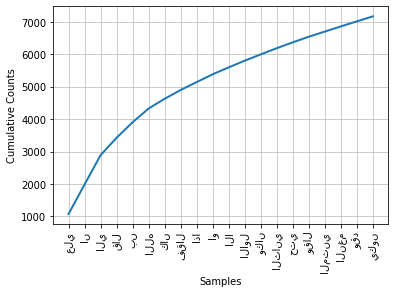

In [138]:
# the 10 most frequent words account for ~ 12% of all word occurrences in the corpus.

fdist_words.plot(20, cumulative=True)

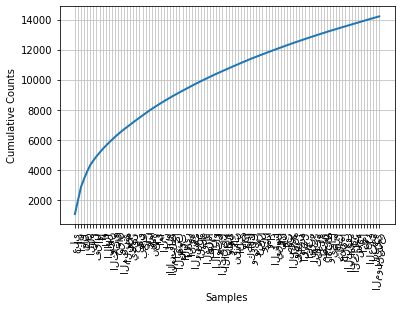

In [137]:
# the 100 most frequent words account for ~ 20% of all word occurrences in the corpus.

fdist_words.plot(100, cumulative=True)

In [146]:
word_freq_df = pd.Series(list(fdist_words.values()),index=list(fdist_words.keys()))
word_freq_df.shape

(20872,)

In [147]:
word_freq_df.describe()

count    20872.000000
mean         3.201083
std         15.666554
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1069.000000
dtype: float64

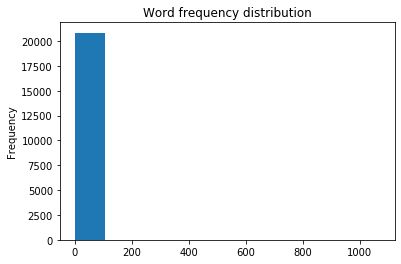

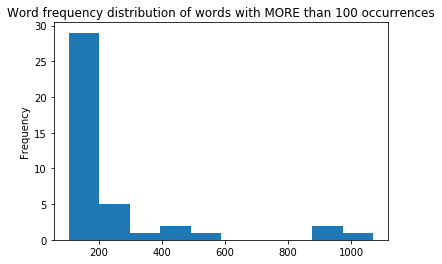

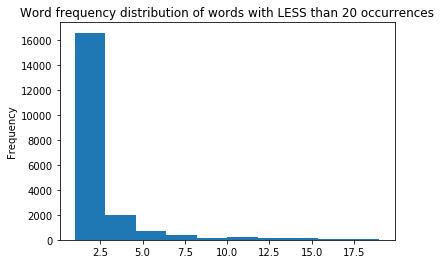

In [160]:
word_freq_df.plot.hist()
fig1=plt.title('Word frequency distribution')
plt.show()
word_freq_df[word_freq_df>100].plot.hist()
fig2=plt.title('Word frequency distribution of words with MORE than 100 occurrences')
plt.show()
word_freq_df[word_freq_df<20].plot.hist()
fig3=plt.title('Word frequency distribution of words with LESS than 20 occurrences')

### Distribution of ngram frequency (n=1,2,3)

In [173]:
fdist_ngrams = FreqDist([tok for doc in corpus_ngrams for tok in doc])
fdist_ngrams.N(),fdist_ngrams.B()
print("number of ngrams:",fdist_ngrams.N())
print("number of distinct ngrams:",fdist_ngrams.B())
print('Number of distinct ngrams that occur only once:',(pd.Series(list(fdist_ngrams.values()))==1).sum())

number of ngrams: 200322
number of distinct ngrams: 140269
Number of grams that occur only once: 125664


In [174]:
print('The 20 most common ngrams:')
fdist_ngrams.most_common(20)

The 20 most common ngrams:


[('علي', 1069),
 ('ان', 914),
 ('الي', 904),
 ('قال', 538),
 ('بن', 480),
 ('الله', 423),
 ('كان', 301),
 ('فقال', 271),
 ('اذا', 244),
 ('او', 241),
 ('الا', 213),
 ('الاول', 207),
 ('وكان', 195),
 ('الثاني', 190),
 ('حتي', 182),
 ('وقال', 173),
 ('المثني', 159),
 ('النغم', 159),
 ('وقد', 156),
 ('يكون', 154)]

### Observations and conclusions

- more than 65% of the tokens (words or ngrams) occur only once in the entire corpus, i.e. hapaxes.
- I believe light stemming will help conflate similar words and reduce the number of hapaxes ...

******

## Save results to a file

In [176]:
with open('../pickle_files/doc_tokenized_data.pickle', 'wb') as f:
    pickle.dump([corpus_words, corpus_ngrams], f)